In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from api_keys import api_key
from citipy import citipy

In [2]:
output_data_file = "output_data/cities.csv"

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

629

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities[0]

query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'

weather_response = requests.get(query_url)
weather_json = weather_response.json()

pprint(weather_json)
print('\n')

cloudiness = weather_json['clouds']['all']
country = weather_json['sys']['country']
date = weather_json['dt']
lat = weather_json['coord']['lat']
lng = weather_json['coord']['lon']
maxTemp = weather_json ['main']['temp_max']
windSpeed = weather_json['wind']['speed']
humidity = weather_json['main']['humidity']

print(cloudiness)
print(country)
print(date)
print(lat)
print(lng)
print(maxTemp)
print(windSpeed)
print(humidity)

{'base': 'model',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -6.22, 'lon': 155.63},
 'dt': 1571925661,
 'id': 2094027,
 'main': {'grnd_level': 1005,
          'humidity': 78,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 80.13,
          'temp_max': 80.13,
          'temp_min': 80.13},
 'name': 'Kieta',
 'sys': {'country': 'PG', 'sunrise': 1571944371, 'sunset': 1571988610},
 'timezone': 39600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 182, 'speed': 5.1}}


96
PG
1571925661
-6.22
155.63
80.13
5.1
78


In [6]:
city_weather = pd.DataFrame(cities, columns=['City'])
city_weather[['Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]=pd.DataFrame([['','','','','','','','']], index=city_weather.index)


print('Beginning Data Retrieval')
print('---------------------------')
for index,row in city_weather.iterrows():
    city = row['City']
    try:
    
        query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'
        
      
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
       
        cloudiness = weather_json['clouds']['all']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        maxTemp = weather_json ['main']['temp_max']
        windSpeed = weather_json['wind']['speed']
        humidity = weather_json['main']['humidity']
        
        
        city_weather.loc[index,'Cloudiness'] = cloudiness
        city_weather.loc[index,'Country'] = country
        city_weather.loc[index,'Date'] = date
        city_weather.loc[index,'Humidity'] = humidity
        city_weather.loc[index,'Lat'] = lat
        city_weather.loc[index,'Lng'] = lng
        city_weather.loc[index,'Max Temp'] = maxTemp
        city_weather.loc[index,'Wind Speed'] = windSpeed

        print(f'Processing Record {index} of Set | {city}')
    except (KeyError, IndexError):
        print('City not found. Skipping...')

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
---------------------------
Processing Record 0 of Set | kieta
Processing Record 1 of Set | atuona
Processing Record 2 of Set | port elizabeth
Processing Record 3 of Set | mar del plata
Processing Record 4 of Set | karratha
City not found. Skipping...
Processing Record 6 of Set | dalbandin
Processing Record 7 of Set | port alfred
Processing Record 8 of Set | mahebourg
Processing Record 9 of Set | atar
Processing Record 10 of Set | punta arenas
Processing Record 11 of Set | alofi
Processing Record 12 of Set | gimbi
Processing Record 13 of Set | wiarton
Processing Record 14 of Set | victoria
Processing Record 15 of Set | kingston
Processing Record 16 of Set | yellowknife
Processing Record 17 of Set | sakit
Processing Record 18 of Set | carnarvon
Processing Record 19 of Set | khatanga
Processing Record 20 of Set | isla vista
Processing Record 21 of Set | tabou
Processing Record 22 of Set | mount gambier
Processing Record 23 of Set | inhambane
Processing Record 24 

Processing Record 213 of Set | vanavara
Processing Record 214 of Set | yulara
Processing Record 215 of Set | faya
Processing Record 216 of Set | shostka
Processing Record 217 of Set | imuris
Processing Record 218 of Set | brownsville
City not found. Skipping...
Processing Record 220 of Set | pangnirtung
Processing Record 221 of Set | saskylakh
Processing Record 222 of Set | peniche
Processing Record 223 of Set | mangrol
Processing Record 224 of Set | katsuura
Processing Record 225 of Set | chapais
Processing Record 226 of Set | mirabad
Processing Record 227 of Set | guerrero negro
Processing Record 228 of Set | port hardy
Processing Record 229 of Set | san cristobal
Processing Record 230 of Set | shimoda
Processing Record 231 of Set | culfa
Processing Record 232 of Set | sharanga
Processing Record 233 of Set | umm lajj
City not found. Skipping...
Processing Record 235 of Set | ayolas
Processing Record 236 of Set | tiksi
Processing Record 237 of Set | srednekolymsk
Processing Record 238

Processing Record 424 of Set | fort smith
Processing Record 425 of Set | lynn haven
City not found. Skipping...
City not found. Skipping...
Processing Record 428 of Set | erzin
Processing Record 429 of Set | oum hadjer
City not found. Skipping...
Processing Record 431 of Set | fukue
Processing Record 432 of Set | naklo nad notecia
Processing Record 433 of Set | san joaquin
Processing Record 434 of Set | palmer
City not found. Skipping...
Processing Record 436 of Set | medveditskiy
Processing Record 437 of Set | rivadavia
Processing Record 438 of Set | broken hill
Processing Record 439 of Set | kargil
Processing Record 440 of Set | khomutovo
Processing Record 441 of Set | buraydah
City not found. Skipping...
Processing Record 443 of Set | swan river
Processing Record 444 of Set | leningradskiy
Processing Record 445 of Set | rocha
Processing Record 446 of Set | port blair
Processing Record 447 of Set | ulkan
Processing Record 448 of Set | tonstad
Processing Record 449 of Set | pevek
Proc

In [7]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kieta,96,PG,1571925661,78,-6.22,155.63,80.13,5.1
1,atuona,70,PF,1571925684,74,-9.8,-139.03,79.03,11.59
2,port elizabeth,1,US,1571925684,50,39.31,-74.98,62.01,3.38
3,mar del plata,5,AR,1571925684,23,-46.43,-67.52,66.65,18.03
4,karratha,0,AU,1571925685,68,-20.74,116.85,80.04,17.38


In [8]:
city_weather.to_csv(output_data_file)

In [9]:
city_weather['Cloudiness'].replace('', np.nan, inplace=True)

city_weather = city_weather.dropna()

In [10]:
city_weather.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [11]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kieta,96.0,PG,1571925661,78,-6.22,155.63,80.13,5.1
1,atuona,70.0,PF,1571925684,74,-9.8,-139.03,79.03,11.59
2,port elizabeth,1.0,US,1571925684,50,39.31,-74.98,62.01,3.38
3,mar del plata,5.0,AR,1571925684,23,-46.43,-67.52,66.65,18.03
4,karratha,0.0,AU,1571925685,68,-20.74,116.85,80.04,17.38


In [12]:
from datetime import datetime
currentDate = datetime.now().date().strftime('%m/%d/%y')

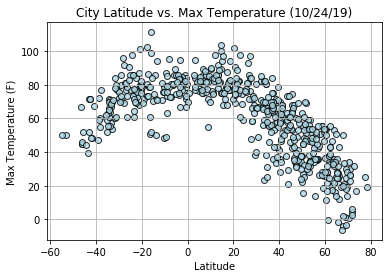

In [13]:
plt.scatter(city_weather.Lat,city_weather['Max Temp'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({currentDate})')

plt.savefig('Images/City Latitude vs. Max Temperature.png')
plt.show()

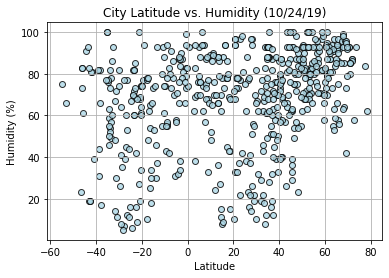

In [14]:
plt.scatter(city_weather.Lat,city_weather.Humidity,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({currentDate})')

plt.savefig('Images/City Latitude vs. Humidity.png')
plt.show()

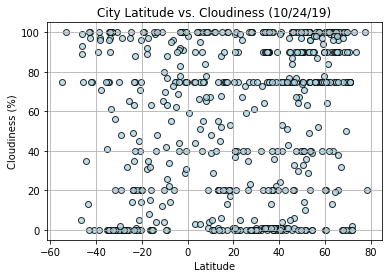

In [15]:
plt.scatter(city_weather.Lat,city_weather.Cloudiness,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({currentDate})')

plt.savefig('Images/City Latitude vs. Cloudiness.png')
plt.show()

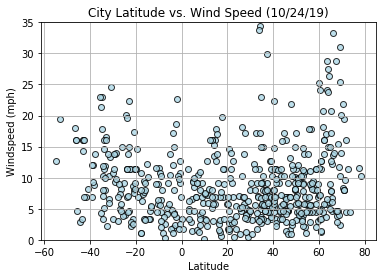

In [16]:
plt.scatter(city_weather.Lat,city_weather['Wind Speed'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.ylim(0,35)
plt.title(f'City Latitude vs. Wind Speed ({currentDate})')

plt.savefig('Images/City Latitude vs. Wind Speed.png')
plt.show()

In [ ]:
# Analysis
# We can see some correlation b/w latitude & max temp.
# No noticeanle corr. b/w latitude & humidity
# No noticeable corr. b/w lat and windspeed